# Big Mart Sales Prediction

### Problem Statement:
                        The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

    Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

    Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Data  (Train Data)

In [2]:
df = pd.read_csv("train.csv")
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


## Exploratory Data Analysis - EDA

In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Note:** We have 2 columns in which Missing values exist

- Item_Weight
- Outlet_Size

**Correlation:** Correlation explains how one or more variables are **related** to each other. These variables can be input data features which have been used to forecast our target variable. Correlation, statistical technique which determines how one variables moves/changes in relation with the other variable

In [6]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

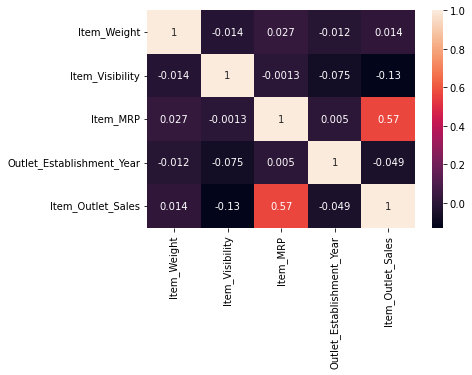

In [7]:
# Understanding correlation
sns.heatmap(df.corr(), annot=True)

## Feature Selection: 
                    Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.
                    
### Methods:

1. Filter methods (Information Gain, Chi-square Test, Fisher’s Score, Correlation Coefficient)

2. Wrapper methods

3. Embedded methods

4. Hybrid methods


**Note:** FOR THE SAKE OF SIMPLICITY, WE ARE NOT DOING FEATURE SELECTION HERE. INSTEAD, WE ARE USING ALL FEATURES FOR PREDICTIONS.

# Data Cleaning

Now, it's time to handle missing values (Null values)

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

### We have impute all missing values with best values!

# Data Cleaning Done...

In [16]:
df.shape

(8523, 12)

# Now it's time to check if their is some formatting mistakes in features or not.

### Checking only Catagorical Features...

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
df['New_Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':'Low Fat', 'LF':'Low Fat', 'low fat':'Low Fat', 'Regular':'Regular', 'reg':'Regular'})

In [22]:
df.shape

(8523, 13)

In [20]:
df['New_Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: New_Item_Fat_Content, dtype: int64

In [21]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Fat
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Regular
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low Fat


In [23]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [24]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [25]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [26]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Fat_Content       8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

# Now, there is no formatting mistakes in any feature of our Dataset

In [28]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Fat
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Regular
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low Fat


In [29]:
df.shape

(8523, 13)

# Done with Data Cleaning and Feature Formating!

#### Now, it's time to transfrom catagorical features into numeric features!

# Feature Encoding (Catagorical Encoding):

    Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.
    
    Mainly, there are two types of feature encoding:
    1 - Ordinal Encoding
    2 - Nominal Encoding

## Ordinal Encoding:

In [30]:
import category_encoders as ce

In [31]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=df['Outlet_Size'],return_df=True,
                           mapping=[{'col':'Outlet_Size',
'mapping':{'High':1,'Medium':2,'Small':3}}])

In [32]:
#fit and transform train data 
df_train_transformed = encoder.fit_transform(df)

In [33]:
df_train_transformed.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380,Low Fat
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228,Regular
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700,Low Fat


In [34]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=df['Outlet_Location_Type'],return_df=True,
                           mapping=[{'col':'Outlet_Location_Type',
'mapping':{'Tier 1':1,'Tier 2':2,'Tier 3':3}}])

In [35]:
#fit and transform train data 
df_train_transformed_1 = encoder.fit_transform(df_train_transformed)

In [37]:
df_train_transformed_1.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,1,Supermarket Type1,3735.1380,Low Fat
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,Supermarket Type2,443.4228,Regular
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,1,Supermarket Type1,2097.2700,Low Fat


In [38]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=df['Outlet_Type'],return_df=True,
                           mapping=[{'col':'Outlet_Type',
'mapping':{'Grocery Store':0, 'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3 }}])

In [39]:
#fit and transform train data 
df_train_transformed_2 = encoder.fit_transform(df_train_transformed_1)

In [40]:
df_train_transformed_2.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,1,1,3735.1380,Low Fat
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,2,443.4228,Regular
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,1,1,2097.2700,Low Fat


In [41]:
df_train_transformed_2.shape

(8523, 13)

In [42]:
df_train_transformed_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Fat_Content       8523 non-null   object 
dtypes: float64(4), int32(3), int64(1), object(5)
mem

# Nominal Encoding:


In [43]:
data_encoded = pd.get_dummies(data = df_train_transformed_2['New_Item_Fat_Content'],drop_first=True)


In [44]:
data_encoded


,Regular
0,0
1,1
2,0
3,1
4,0
...,...
8518,0
8519,1
8520,0
8521,1


In [45]:
df_train_transformed_2['Newest_Item_Fat_Content'] = data_encoded

In [47]:
df_train_transformed_2.shape

(8523, 14)

In [46]:
df_train_transformed_2.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Fat_Content,Newest_Item_Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,1,1,3735.1380,Low Fat,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,2,443.4228,Regular,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,1,1,2097.2700,Low Fat,0


In [48]:
df_train_transformed_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Fat_Content       8523 non-null   object 
 13  Newest_Item_Fat_Content    8523 non-null   uint8

In [49]:
df_train_transformed_2['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [52]:
df_train_transformed_2['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [56]:
df_train_transformed_2['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [57]:
data_encoded_1 = pd.get_dummies(data=df_train_transformed_2['Item_Type'],drop_first=True)
data_encoded_1.head(3)

,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [58]:
data_encoded_1.shape

(8523, 15)

In [59]:
df_train_transformed_2 = df_train_transformed_2.join(data_encoded_1)

In [60]:
df_train_transformed_2.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,1,...,0,0,0,0,1,0,0,0,0,0


In [61]:
df_train_transformed_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Fat_Content       8523 non-null   object 
 13  Newest_Item_Fat_Content    8523 non-null   uint8

# Now, we drop irrelavent features

In [62]:
df_train_transformed_2.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'New_Item_Fat_Content'], axis = 1, inplace= True)

In [63]:
df_train_transformed_2

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Newest_Item_Fat_Content,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300,0.016047,249.8092,1999,2,1,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,2009,2,3,2,443.4228,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0.016760,141.6180,1999,2,1,1,2097.2700,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,0.000000,182.0950,1998,2,3,0,732.3800,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,1,3,1,994.7052,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,3,1,2778.3834,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,0.046982,108.1570,2002,2,2,1,549.2850,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0.035186,85.1224,2004,3,2,1,1193.1136,0,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,0.145221,103.1332,2009,2,3,2,1845.5976,1,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
df_train_transformed_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Outlet_Size                8523 non-null   int32  
 5   Outlet_Location_Type       8523 non-null   int32  
 6   Outlet_Type                8523 non-null   int32  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Newest_Item_Fat_Content    8523 non-null   uint8  
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

In [65]:
df_train_transformed_2.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Newest_Item_Fat_Content      0
Breads                       0
Breakfast                    0
Canned                       0
Dairy                        0
Frozen Foods                 0
Fruits and Vegetables        0
Hard Drinks                  0
Health and Hygiene           0
Household                    0
Meat                         0
Others                       0
Seafood                      0
Snack Foods                  0
Soft Drinks                  0
Starchy Foods                0
dtype: int64

# Now, all the Data is in Numeric Form. There is no catagorical feature left :)

In [66]:
df_train_transformed_2

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Newest_Item_Fat_Content,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300,0.016047,249.8092,1999,2,1,1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,2009,2,3,2,443.4228,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0.016760,141.6180,1999,2,1,1,2097.2700,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,0.000000,182.0950,1998,2,3,0,732.3800,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,1,3,1,994.7052,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,3,1,2778.3834,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,0.046982,108.1570,2002,2,2,1,549.2850,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0.035186,85.1224,2004,3,2,1,1193.1136,0,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,0.145221,103.1332,2009,2,3,2,1845.5976,1,0,...,0,0,0,0,0,0,0,1,0,0


# Train Test Split

In [67]:
X = df_train_transformed_2.drop('Item_Outlet_Sales',axis=1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0.016047,249.8092,1999,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,2,3,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,2,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,2,3,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,1,3,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [68]:
X.shape

(8523, 23)

In [69]:
y = df_train_transformed_2['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Importing X_Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)


In [82]:
y_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
3288,12.857645,0.031187,39.5480,1985,2,3,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2206,12.650000,0.076199,191.3846,2002,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
170,14.500000,0.019472,164.8210,2004,3,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6526,12.857645,0.057762,237.3564,1985,2,3,3,1,0,0,...,1,0,0,0,0,0,0,0,0,0
135,7.235000,0.076856,116.0492,1997,3,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395000,0.286345,139.1838,1998,2,3,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5191,15.600000,0.117575,75.6670,2007,2,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,17.600000,0.018944,237.3590,2002,2,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
860,20.350000,0.054363,117.9466,2007,2,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## We will train our model by fitting the X_train & y_train data to our model.

# Feature Scaling:
    Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

In [78]:
X_train.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
3288,12.857645,0.031187,39.5480,1985,2,3,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2206,12.650000,0.076199,191.3846,2002,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
170,14.500000,0.019472,164.8210,2004,3,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
print(X_train_norm)

[[0.4943522  0.09496851 0.03505117 ... 0.         0.         0.        ]
 [0.48198869 0.23203687 0.67952329 ... 0.         0.         0.        ]
 [0.59214052 0.05929423 0.5667738  ... 0.         0.         0.        ]
 ...
 [0.77671926 0.05768632 0.87466214 ... 0.         0.         0.        ]
 [0.94045847 0.16554261 0.36781489 ... 1.         0.         0.        ]
 [0.70229235 0.05174687 0.27356298 ... 0.         0.         0.        ]]


In [80]:
scaled_features_df = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

In [81]:
scaled_features_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
3288,0.494352,0.094969,0.035051,0.000000,0.5,1.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2206,0.481989,0.232037,0.679523,0.708333,0.5,0.5,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.592141,0.059294,0.566774,0.791667,1.0,0.5,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
scaled_features_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,...,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000
mean,0.498693,0.199803,0.469522,0.535398,0.585377,0.561033,0.403503,0.350613,0.026620,0.013310,...,0.149912,0.026795,0.062347,0.110508,0.046760,0.020315,0.006655,0.139755,0.051138,0.019615
std,0.251233,0.155285,0.266125,0.349607,0.300385,0.405121,0.266565,0.477204,0.160984,0.114609,...,0.357017,0.161498,0.241805,0.313549,0.211143,0.141089,0.081313,0.346763,0.220299,0.138684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294433,0.082066,0.266783,0.083333,0.500000,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494352,0.163161,0.477889,0.583333,0.500000,0.500000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.687407,0.286557,0.660129,0.791667,1.000000,1.000000,0.333333,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
X_train =  scaled_features_df

In [85]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
3288,0.494352,0.094969,0.035051,0.000000,0.5,1.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2206,0.481989,0.232037,0.679523,0.708333,0.5,0.5,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.592141,0.059294,0.566774,0.791667,1.0,0.5,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6526,0.494352,0.175895,0.874651,0.000000,0.5,1.0,1.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,0.159571,0.234037,0.359761,0.500000,1.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.288181,0.871963,0.457956,0.541667,0.5,1.0,0.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.657636,0.358032,0.188359,0.916667,0.5,0.5,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.776719,0.057686,0.874662,0.708333,0.5,0.5,0.333333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.940458,0.165543,0.367815,0.916667,0.5,0.5,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Now, scale X_test

In [88]:
norm = MinMaxScaler().fit(X_test)

# transform testing data
X_test_norm = norm.transform(X_test)


In [89]:
X_test_norm

array([[0.57935561, 0.08190149, 0.20187856, ..., 0.        , 0.        ,
        0.        ],
       [0.19928401, 0.2215277 , 0.04528219, ..., 0.        , 0.        ,
        0.        ],
       [0.59128878, 0.12865547, 0.04245402, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07130072, 0.12639442, 0.63231135, ..., 1.        , 0.        ,
        0.        ],
       [0.01968974, 0.14311082, 0.71223684, ..., 0.        , 0.        ,
        0.        ],
       [0.56145585, 0.42454818, 0.09711793, ..., 0.        , 0.        ,
        0.        ]])

In [90]:
scaled_features_df_1 = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

In [91]:
scaled_features_df_1.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
7503,0.579356,0.081901,0.201879,0.083333,0.0,1.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2957,0.199284,0.221528,0.045282,0.500000,1.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7031,0.591289,0.128655,0.042454,0.583333,0.5,0.0,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
scaled_features_df_1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,...,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000
mean,0.484467,0.209223,0.456480,0.533164,0.585496,0.547103,0.394123,0.356914,0.035194,0.012087,...,0.133665,0.021685,0.058301,0.099182,0.056168,0.018841,0.009243,0.142908,0.054390,0.012798
std,0.252775,0.164412,0.261730,0.347284,0.299768,0.408832,0.263219,0.479174,0.184302,0.109293,...,0.340353,0.145679,0.234353,0.298960,0.230286,0.135988,0.095711,0.350041,0.226827,0.112421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269093,0.084398,0.261222,0.083333,0.500000,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.493296,0.169299,0.462372,0.583333,0.500000,0.500000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.671838,0.300414,0.644241,0.791667,1.000000,1.000000,0.333333,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
X_test=  scaled_features_df_1

In [95]:
X_test.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
7503,0.579356,0.081901,0.201879,0.083333,0.0,1.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2957,0.199284,0.221528,0.045282,0.500000,1.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7031,0.591289,0.128655,0.042454,0.583333,0.5,0.0,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Done with Scaling of both X_train & X_test

# Modeling:

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
reg = LinearRegression().fit(X_train, y_train)

In [98]:
y_pred = reg.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
mean_squared_error(y_test, y_pred, squared=False)

1177.0988230289079

# Actual Test data 

In [101]:
test_data = pd.read_csv('test.csv')

In [102]:
test_data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [103]:
test_data.shape

(5681, 11)

In [104]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [105]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [106]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)

In [107]:
test_data['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [108]:
test_data['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [109]:
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

In [110]:
test_data['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [111]:
test_data['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [112]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Done with null values

In [113]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [114]:
test_data['New_Item_Fat_Content'] = test_data['Item_Fat_Content'].map({'Low Fat':'Low Fat', 'LF':'Low Fat', 'low fat':'Low Fat', 'Regular':'Regular', 'reg':'Regular'})

In [115]:
test_data['New_Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: New_Item_Fat_Content, dtype: int64

In [116]:
test_data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Fat_Content
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Low Fat
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Regular
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Low Fat


In [117]:
test_data['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [118]:
test_data['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [119]:

test_data['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [120]:

test_data['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [121]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=test_data['Outlet_Size'],return_df=True,
                           mapping=[{'col':'Outlet_Size',
'mapping':{'High':1,'Medium':2,'Small':3}}])

In [122]:
#fit and transform train data 

df_test_transformed = encoder.fit_transform(test_data)

In [123]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=df_test_transformed['Outlet_Location_Type'],return_df=True,
                           mapping=[{'col':'Outlet_Location_Type',
'mapping':{'Tier 1':1,'Tier 2':2,'Tier 3':3}}])

In [124]:
#fit and transform train data 

df_test_transformed_1 = encoder.fit_transform(df_test_transformed)

In [125]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=df_test_transformed_1['Outlet_Type'],return_df=True,
                           mapping=[{'col':'Outlet_Type',
'mapping':{'Grocery Store':0, 'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3 }}])

In [126]:
#fit and transform train data 

df_test_transformed_2 = encoder.fit_transform(df_test_transformed_1)

In [128]:
df_test_transformed_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Fat_Content
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,2,1,1,Low Fat
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,2,2,1,Regular
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,2,3,0,Low Fat
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,2,2,1,Low Fat
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,2,3,3,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,3,1,1,Regular
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,2,3,2,Regular
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,2,2,1,Low Fat
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,2,2,1,Regular


In [129]:
test_encoded=pd.get_dummies(data=df_test_transformed_2['New_Item_Fat_Content'],drop_first=True)
test_encoded

,Regular
0,0
1,1
2,0
3,0
4,1
...,...
5676,1
5677,1
5678,0
5679,1


In [130]:
df_test_transformed_2['Newest_Item_Fat_Content'] = test_encoded

In [131]:
df_test_transformed_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Fat_Content,Newest_Item_Fat_Content
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,2,1,1,Low Fat,0
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,2,2,1,Regular,1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,2,3,0,Low Fat,0
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,2,2,1,Low Fat,0
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,2,3,3,Regular,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,3,1,1,Regular,1
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,2,3,2,Regular,1
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,2,2,1,Low Fat,0
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,2,2,1,Regular,1


In [132]:
test_encoded_1=pd.get_dummies(data=df_test_transformed_2['Item_Type'],drop_first=True)
test_encoded_1

,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5678,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5679,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
df_test_transformed_2 = df_test_transformed_2.join(test_encoded_1)

In [134]:
df_test_transformed_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,2,1,...,0,0,0,0,0,0,0,1,0,0
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,2,2,...,0,0,0,0,0,0,0,0,0,0
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,2,3,...,0,0,0,0,0,1,0,0,0,0
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,2,2,...,0,0,0,0,0,0,0,1,0,0
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,3,1,...,0,0,0,0,0,0,0,1,0,0
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,2,3,...,0,0,0,0,0,0,0,0,0,1
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,2,2,...,0,0,1,0,0,0,0,0,0,0
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,2,2,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df_test_transformed_2.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'New_Item_Fat_Content'], axis = 1, inplace= True)

In [136]:
df_test_transformed_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Visibility            5681 non-null   float64
 2   Item_MRP                   5681 non-null   float64
 3   Outlet_Establishment_Year  5681 non-null   int64  
 4   Outlet_Size                5681 non-null   int32  
 5   Outlet_Location_Type       5681 non-null   int32  
 6   Outlet_Type                5681 non-null   int32  
 7   Newest_Item_Fat_Content    5681 non-null   uint8  
 8   Breads                     5681 non-null   uint8  
 9   Breakfast                  5681 non-null   uint8  
 10  Canned                     5681 non-null   uint8  
 11  Dairy                      5681 non-null   uint8  
 12  Frozen Foods               5681 non-null   uint8  
 13  Fruits and Vegetables      5681 non-null   uint8

In [137]:
df_test_transformed_2.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Newest_Item_Fat_Content      0
Breads                       0
Breakfast                    0
Canned                       0
Dairy                        0
Frozen Foods                 0
Fruits and Vegetables        0
Hard Drinks                  0
Health and Hygiene           0
Household                    0
Meat                         0
Others                       0
Seafood                      0
Snack Foods                  0
Soft Drinks                  0
Starchy Foods                0
dtype: int64

In [138]:
norm = MinMaxScaler().fit(df_test_transformed_2)

# transform training data
X_test_norm = norm.transform(df_test_transformed_2)

In [139]:
X_test_norm

array([[0.96427508, 0.02337443, 0.32341312, ..., 1.        , 0.        ,
        0.        ],
       [0.22298303, 0.11873688, 0.23584901, ..., 0.        , 0.        ,
        0.        ],
       [0.59809467, 0.30767444, 0.89413994, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32420363, 0.22719437, 0.36979792, ..., 0.        , 0.        ,
        0.        ],
       [0.63977374, 0.        , 0.77848698, ..., 0.        , 0.        ,
        0.        ],
       [0.29443287, 0.32357262, 0.20377803, ..., 0.        , 0.        ,
        0.        ]])

In [140]:
scaled_features_test = pd.DataFrame(X_test_norm, index=df_test_transformed_2.index, columns=df_test_transformed_2.columns)

In [141]:
scaled_features_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.964275,0.023374,0.323413,0.583333,0.5,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.222983,0.118737,0.235849,0.916667,0.5,0.5,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.598095,0.307674,0.894140,0.541667,0.5,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.164335,0.047548,0.524488,0.916667,0.5,0.5,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.484706,0.366458,0.862069,0.000000,0.5,1.0,1.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.353974,0.041702,0.466011,0.500000,1.0,0.0,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5677,0.181304,0.441825,0.584637,1.000000,0.5,1.0,0.666667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5678,0.324204,0.227194,0.369798,0.708333,0.5,0.5,0.333333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5679,0.639774,0.000000,0.778487,0.916667,0.5,0.5,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
test_data = scaled_features_test

In [143]:
test_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.964275,0.023374,0.323413,0.583333,0.5,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.222983,0.118737,0.235849,0.916667,0.5,0.5,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.598095,0.307674,0.894140,0.541667,0.5,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.164335,0.047548,0.524488,0.916667,0.5,0.5,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.484706,0.366458,0.862069,0.000000,0.5,1.0,1.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.353974,0.041702,0.466011,0.500000,1.0,0.0,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5677,0.181304,0.441825,0.584637,1.000000,0.5,1.0,0.666667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5678,0.324204,0.227194,0.369798,0.708333,0.5,0.5,0.333333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5679,0.639774,0.000000,0.778487,0.916667,0.5,0.5,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Newest_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,...,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,0.484706,0.202955,0.464766,0.534538,0.585460,0.556416,0.400458,0.354339,0.029044,0.013378,...,0.137476,0.026052,0.059497,0.112304,0.054744,0.019539,0.004401,0.138884,0.049463,0.021299
std,0.252765,0.158364,0.263468,0.348844,0.300164,0.406412,0.265580,0.478355,0.167945,0.114897,...,0.344379,0.159303,0.236573,0.315768,0.227500,0.138421,0.066197,0.345856,0.216852,0.144392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.276273,0.083572,0.266080,0.083333,0.500000,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.484706,0.167330,0.466437,0.583333,0.500000,0.500000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.672522,0.288788,0.656597,0.791667,1.000000,1.000000,0.333333,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
y_prediction = reg.predict(test_data)

In [146]:
y_prediction

array([2060.54229463, 1272.50215212, 2137.42488475, ..., 1742.25974253,
       3525.36840843, 1198.86602922])

# Done with Test data 

In [147]:
Ahad = pd.DataFrame(columns = ["Item_Identifier","Outlet_Identifier", "Item_Outlet_Sales"])

In [148]:
Ahad

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [149]:
abbasi = pd.read_csv("test.csv")
Ahad["Item_Identifier"] = abbasi.Item_Identifier
Ahad["Outlet_Identifier"] = abbasi.Outlet_Identifier
Ahad["Item_Outlet_Sales"] = y_prediction


In [150]:
Ahad

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2060.542295
1,FDW14,OUT017,1272.502152
2,NCN55,OUT010,2137.424885
3,FDQ58,OUT017,2415.122719
4,FDY38,OUT027,4960.431897
...,...,...,...
5676,FDB58,OUT046,2326.012321
5677,FDD47,OUT018,3118.554782
5678,NCO17,OUT045,1742.259743
5679,FDJ26,OUT017,3525.368408


In [151]:
Ahad.to_csv('Submission_2.csv', index=False)